<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
string.punctuation
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [56]:
%rm -rf sample_data/

In [78]:
list_dec = pd.read_csv('/content/listings_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_march = pd.read_csv('/content/listings_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_jun = pd.read_csv('/content/listings_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_sep = pd.read_csv('/content/listings_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);

In [63]:
print(list_march.shape, list_jun.shape, list_sep.shape, list_dec.shape)

(37631, 74) (37410, 74) (39881, 75) (38277, 74)


In [90]:
df_listings = pd.concat([list_march,list_jun, list_sep,list_dec])

In [ ]:
#df_listings.head(1)

In [ ]:
#df_listings

In [83]:
df_listings = df_listings.drop(columns=['listing_url', 'scrape_id', 'description',
                                        'neighborhood_overview', 'picture_url',  'host_url',
      'host_since', 'host_location', 'host_about', 'host_id', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count','host_response_rate',
       'host_acceptance_rate',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',  'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_nights',
       'availability_365',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
        'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'license', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'source'	], axis=1)

In [67]:
df_listings.head()

id                                      name  host_name  \
0  2595                     Skylit Midtown Castle   Jennifer   
1  5121                           BlissArtsSpace!      Garon   
2  5136  Spacious Brooklyn Duplex, Patio + Garden    Rebecca   
3  5178          Large Furnished Room Near B'way　   Shunichi   
4  5203        Cozy Clean Guest Room - Family Apt  MaryEllen   

   host_response_time host_is_superhost neighbourhood_cleansed  \
0  a few days or more                 f                Midtown   
1                 NaN                 f     Bedford-Stuyvesant   
2      within an hour                 f            Sunset Park   
3  within a few hours                 f                Midtown   
4                 NaN                 f        Upper West Side   

  neighbourhood_group_cleansed  latitude  longitude  \
0                    Manhattan  40.75356  -73.98559   
1                     Brooklyn  40.68535  -73.95512   
2                     Brooklyn  40.66265  -73.99454   
3                    Manhattan  40.76457  -73.98317   
4                    Manhattan  40.80380  -73.96751   

                 property_type  ... accommodates    price  \
0           Entire rental unit  ...            1  $150.00   
1  Private room in rental unit  ...            2   $60.00   
2           Entire rental unit  ...            4  $275.00   
3  Private room in rental unit  ...            2   $68.00   
4  Private room in rental unit  ...            1   $75.00   

  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 4.70                    4.72                       4.62   
1                 4.52                    4.22                       4.09   
2                 5.00                    5.00                       5.00   
3                 4.22                    4.22                       3.74   
4                 4.91                    4.83                       4.82   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.76                         4.79                    4.86   
1                   4.91                         4.91                    4.47   
2                   5.00                         5.00                    4.50   
3                   4.67                         4.43                    4.87   
4                   4.97                         4.95                    4.94   

   review_scores_value  instant_bookable  
0                 4.41                 f  
1                 4.52                 f  
2                 5.00                 f  
3                 4.37                 f  
4                 4.92                 f  

[5 rows x 21 columns]

In [68]:
df_listings.columns

Index(['id', 'name', 'host_name', 'host_response_time', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

## Exploratory Data Analysis


#### Neighbourhoods

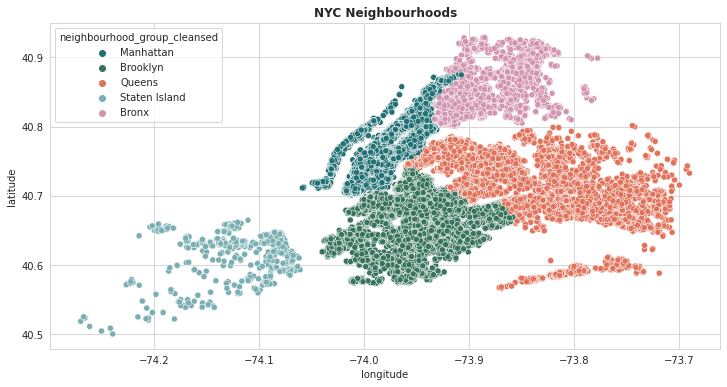

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.neighbourhood_group_cleansed, 
                palette=['#217074','#37745B','#E2725A',"#79AEB2", '#D294AF'])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods',fontweight="bold")
plt.show();

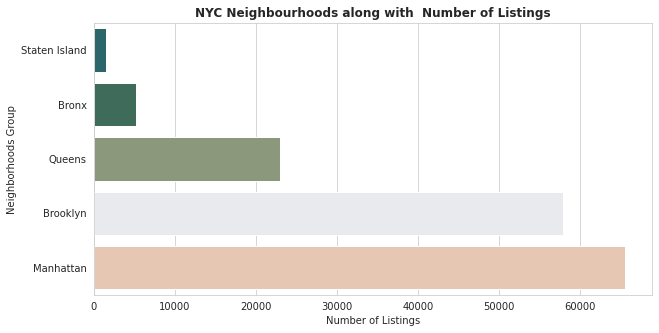

In [ ]:
# Which neighborhood has the highest number of listings?
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).keys(),
        x = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).values, 
        orient='h', palette=['#217074','#37745B','#8B9D77','#E7EAEF','#EDC5AB']);
plt.title('NYC Airbnb Grouped Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighborhoods Group');


In [80]:
df_listings['price'] = df_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [ ]:
fig=px.scatter_mapbox(data_frame=df_listings,
                      lat="latitude",
                      lon="longitude",
                      color="price",
                      hover_data=["price"],
                      hover_name="neighbourhood_group_cleansed",
                      height=500,
                      width=800,
                      size="price",);

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
fig.show();

In [ ]:
# Average price per neighborhood
price_per_neighb = df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_per_neighb = price_per_neighb.reset_index()

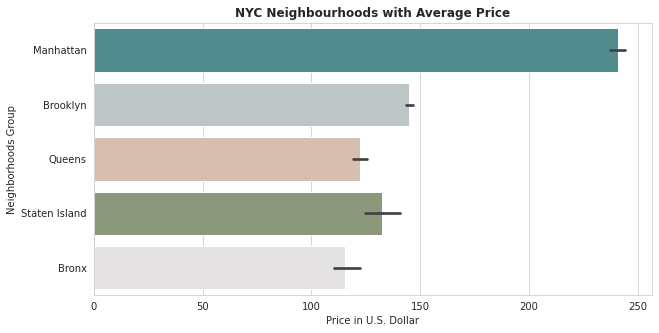

In [ ]:
# Neighborhoods with their average price 
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y = df_listings['neighbourhood_group_cleansed'], x = df_listings['price'],
                 data = price_per_neighb, orient='h', palette=['#469597','#BBC6C8','#DDBEAA','#8B9D77','#E5E3E4'])
plt.title('NYC Airbnb  Grouped Neighbourhoods with Average Price',fontweight="bold")
ax.set_xlabel('Price in U.S. Dollar')
ax.set_ylabel('Neighborhoods Group');



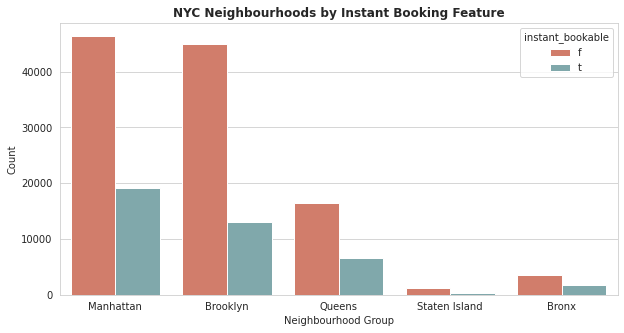

In [ ]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.instant_bookable, palette=['#E2725A',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('NYC Airbnb Grouped Neighbourhoods by Instant Booking Feature',fontweight="bold")
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');

Text(0.5, 1.0, 'NYC Neighbourhoods by Host Type')

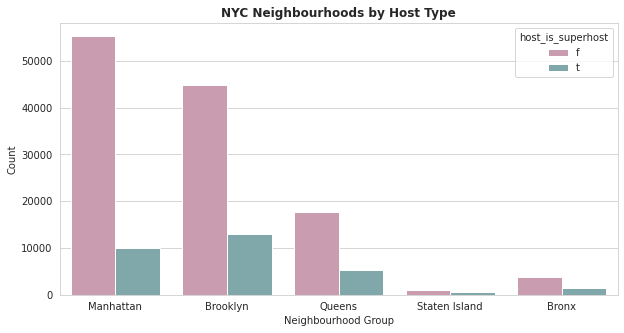

In [ ]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.host_is_superhost, palette=['#D294AF',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")

Text(0.5, 1.0, 'NYC Neighbourhoods by Host Type')

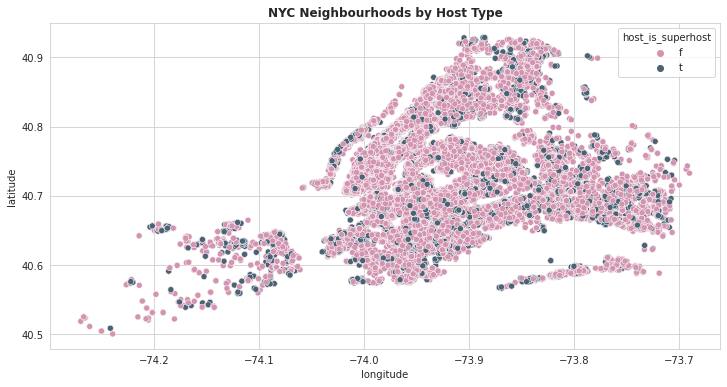

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")


#### Room types, Property type, & Number of people per booking

In [ ]:
#Unique Check
df_listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

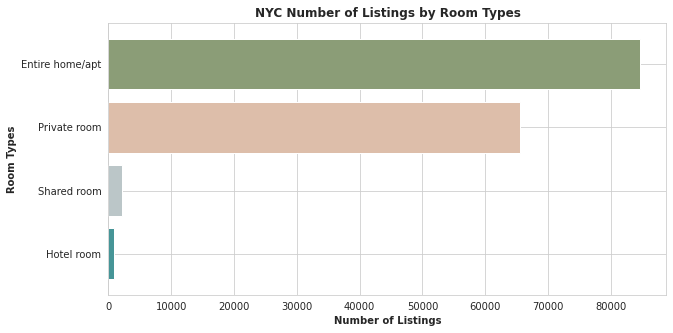

In [ ]:
#Histogram 
freq = df_listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize =(10,5), color=['#469597','#BBC6C8','#DDBEAA','#8B9D77'],width=0.8)
plt.title('NYC Airbnb  Number of Listings by Room Types',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Room Types', fontweight="bold");
plt.show();

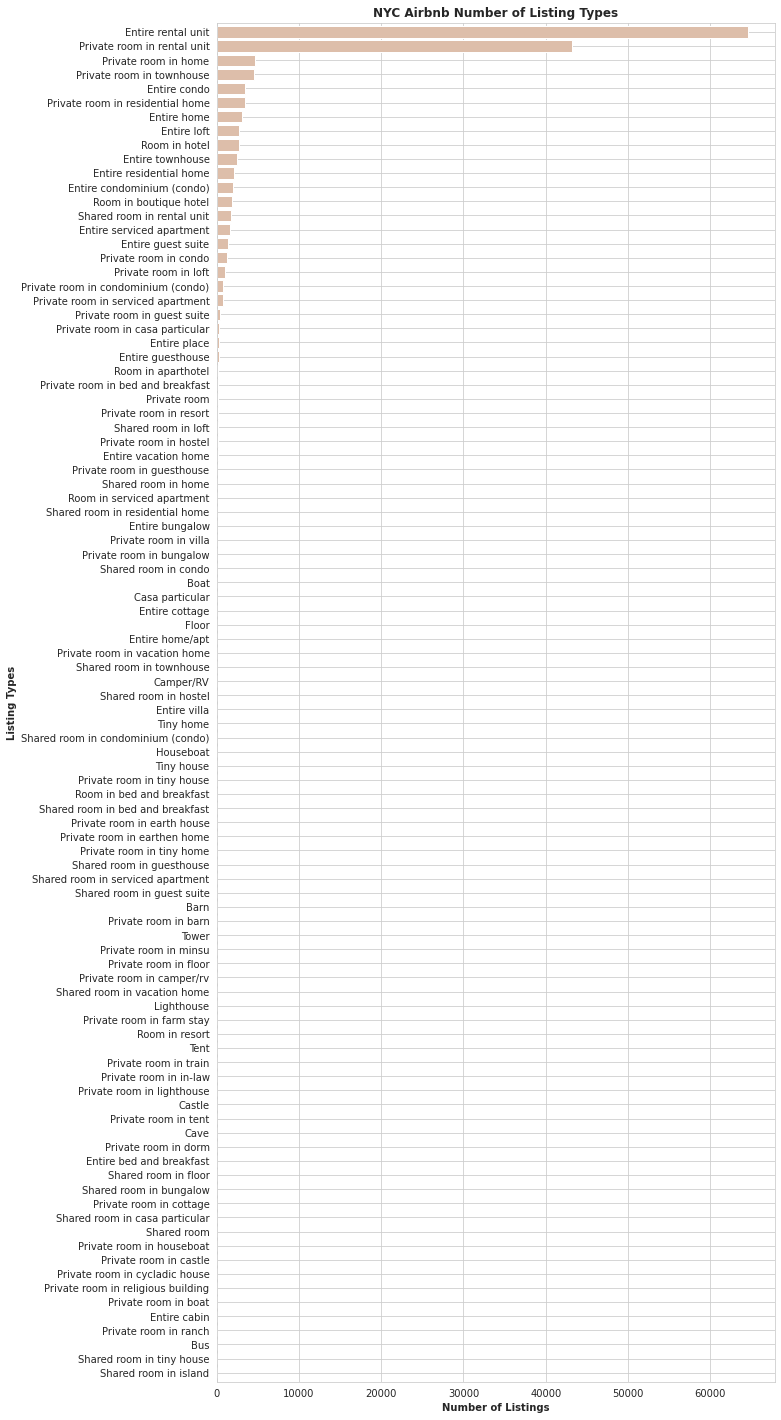

In [69]:
freq_ptype = df_listings['property_type'].value_counts().sort_values(ascending=True)
freq_ptype.plot.barh(figsize =(10,25),width=0.8, color='#DDBEAA')
plt.title('NYC Airbnb Number of Listing Types',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Listing Types', fontweight="bold");
plt.show();

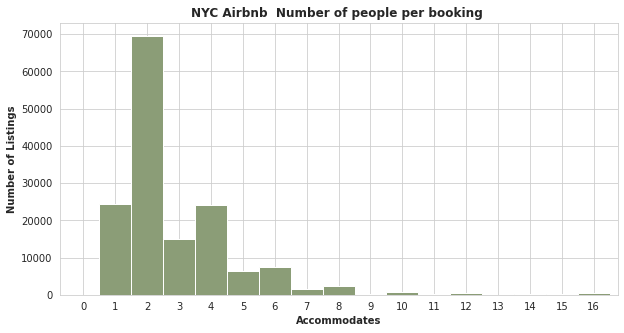

In [ ]:
feq = df_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,5), width=1, rot=0, color='#8B9D77')
plt.title('NYC Airbnb  Number of people per booking ', fontweight="bold")
plt.ylabel('Number of Listings', fontweight="bold")
plt.xlabel('Accommodates', fontweight="bold")
plt.show()

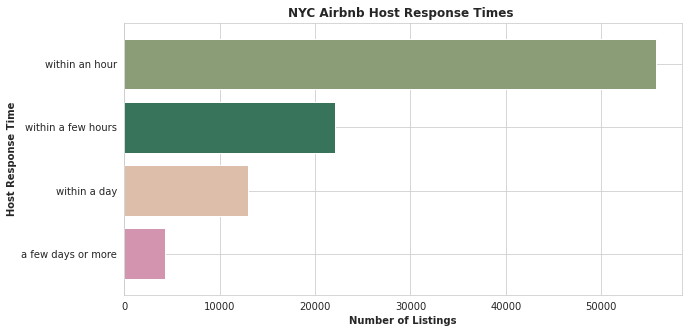

In [ ]:
feq = df_listings['host_response_time'].value_counts().sort_index()
feq.plot.barh(figsize=(10,5), width=0.8, rot=0, color=['#D294AF', '#DDBEAA','#37745B','#8B9D77'])
plt.title('NYC Airbnb Host Response Times ', fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Host Response Time', fontweight="bold")
plt.show()

In [70]:
df_listings.columns

Index(['id', 'name', 'host_name', 'host_response_time', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [87]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116309 entries, 0 to 38247
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            116309 non-null  int64  
 1   name                          116285 non-null  object 
 2   host_name                     116205 non-null  object 
 3   neighbourhood_cleansed        116309 non-null  object 
 4   neighbourhood_group_cleansed  116309 non-null  object 
 5   latitude                      116309 non-null  float64
 6   longitude                     116309 non-null  float64
 7   property_type                 116309 non-null  object 
 8   room_type                     116309 non-null  object 
 9   accommodates                  116309 non-null  int64  
 10  price                         116309 non-null  float64
 11  review_scores_rating          116309 non-null  float64
 12  review_scores_accuracy        116309 non-null

In [86]:
df_listings.drop(columns=['host_response_time','host_is_superhost'], inplace=True)

In [88]:
df_listings

id                                                name  \
0          2595                               Skylit Midtown Castle   
1          5121                                     BlissArtsSpace!   
2          5136            Spacious Brooklyn Duplex, Patio + Garden   
3          5178                    Large Furnished Room Near B'way　   
4          5203                  Cozy Clean Guest Room - Family Apt   
...         ...                                                 ...   
38021  53572597                             Astoria Luxury suite 2A   
38153  53609786  Newly renovated suite in the heart of Williamsburg   
38164  53612732       Perfect Room to Stay in Brooklyn! Near Metro!   
38168  53614162        New Beautiful Modern One Bedroom in Brooklyn   
38247  53648074     Large, modern, private 1 bedroom in beach condo   

       host_name neighbourhood_cleansed neighbourhood_group_cleansed  \
0       Jennifer                Midtown                    Manhattan   
1          Garon     Bedford-Stuyvesant                     Brooklyn   
2        Rebecca            Sunset Park                     Brooklyn   
3       Shunichi                Midtown                    Manhattan   
4      MaryEllen        Upper West Side                    Manhattan   
...          ...                    ...                          ...   
38021      Vicky                Astoria                       Queens   
38153     Samuel           Williamsburg                     Brooklyn   
38164     Carlos     Bedford-Stuyvesant                     Brooklyn   
38168      Lexia          East Flatbush                     Brooklyn   
38247    Justine                Arverne                       Queens   

        latitude  longitude                property_type        room_type  \
0      40.753560 -73.985590           Entire rental unit  Entire home/apt   
1      40.685350 -73.955120  Private room in rental unit     Private room   
2      40.662650 -73.994540           Entire rental unit  Entire home/apt   
3      40.764570 -73.983170  Private room in rental unit     Private room   
4      40.803800 -73.967510  Private room in rental unit     Private room   
...          ...        ...                          ...              ...   
38021  40.766867 -73.924403     Private room in bungalow     Private room   
38153  40.710918 -73.959553           Entire rental unit  Entire home/apt   
38164  40.678150 -73.910910  Private room in rental unit     Private room   
38168  40.660757 -73.929937           Entire rental unit  Entire home/apt   
38247  40.591505 -73.795033  Private room in rental unit     Private room   

       accommodates   price  review_scores_rating  review_scores_accuracy  \
0                 1   150.0                  4.70                    4.72   
1                 2    60.0                  4.52                    4.22   
2                 4   275.0                  5.00                    5.00   
3                 2    68.0                  4.22                    4.22   
4                 1    75.0                  4.91                    4.83   
...             ...     ...                   ...                     ...   
38021             2    89.0                  5.00                    5.00   
38153             6  1980.0                  5.00                    5.00   
38164             2    64.0                  1.00                    1.00   
38168             3    84.0                  5.00                    5.00   
38247             1    70.0                  5.00                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.62                   4.76   
1                           4.09                   4.91   
2                           5.00                   5.00   
3                           3.74                   4.67   
4                           4.82                   4.97   
...                          ...                    ...   
38021                       5.00